In [42]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math
import sympy as sym

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

#### Exercise 6.1.1

Let $X_1,X_2,...,X_n$ be a random sample on $X$ that has a $\Gamma(\alpha = 4,\beta = \theta)$
distribution, $0 < \theta < \infty.$

(a) Determine the mle of $\theta$.

(b) Suppose the following data is a realization (rounded) of a random sample on $X$. Obtain a histogram with the argument $pr=T$ (data are in ex6111.rda).
$9,39,38,23,8,47,21,22,18,10,17,22,14,9,5,26,11,31,15,25,9,29,28,19,8.$

(c) For this sample, obtain $\hat{\theta}$ the realized value of the mle and locate $4\hat{\theta}$ on the histogram. Overlay the $\Gamma(\alpha = 4,\beta = \hat{\theta})$ pdf on the histogram. Does the data agree with this pdf? Code for overlay:

xs=sort(x);y=dgamma(xs,4,1/betahat);hist(x,pr=T);lines(y~xs).

(a) The drudgery of finding the MLE was in and of itself painful and trivial, and typing those equations is not worth the time. It comes down to maximizing $$\frac{e^{-n\frac{\overline{X}}{\theta}}}{\theta^4},$$ where $\overline{X}$ is the sample mean and MLE ends up being $\hat{\theta}=\overline{X}/4$.

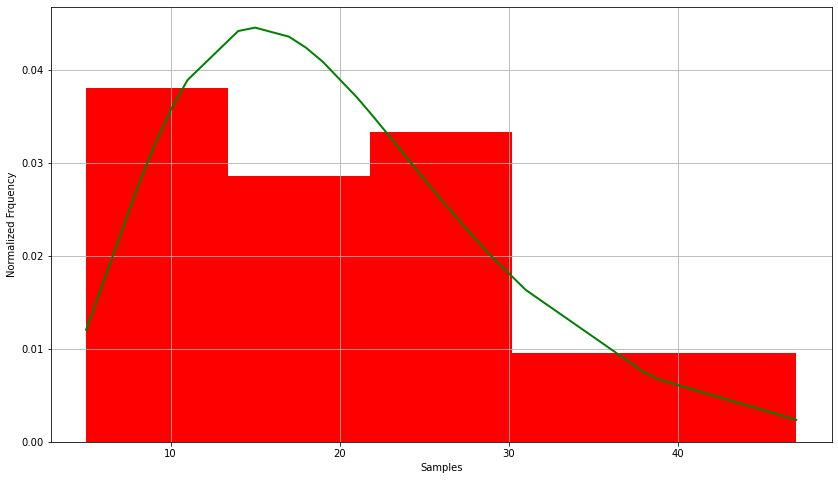

In [43]:
x=[9,39,38,23,8,47,21,22,18,10,17,22,14,9,5,26,11,31,15,25,9,29,28,19,8]

x2=np.sort(x)
tmle = np.mean(x)/4
y=gamma.pdf(x2,a=4,loc=0,scale=tmle)

plt.figure(figsize=(14,8))

plt.hist(x,bins=int(len(x)/5),color='r',density=True)
plt.plot(x2,y,linewidth=2,color='g')
plt.xlabel('Samples')
plt.ylabel('Normalized Frquency')
plt.grid()
plt.show()

In [44]:
print(4*tmle,np.mean(x))

20.12 20.12


#### Exercise 6.1.2, 6.1.3, 6.1.4

Tomoki Okuno has solutions in -- https://tomoki-okuno.com/

#### Exercise 6.1.5

Consider the pdf in Exercise $6.1.4$.

(a) Using Theorem $4.8.1$, show how to generate observations from this pdf.

(b) The following data were generated from this pdf. Find the mles of $\theta$ and the median.

(a) $F^{-1}(u)=\theta\sqrt{u}$

In [52]:
#### (b) 
x=[1.2,7.7,4.3,4.1,7.1,6.3,5.3,6.3,5.3,2.8,3.8,7.0,4.5,5.0,6.3,6.7,5.0,7.4,7.5,7.5]
print('MLE of \u03B8 and that of median are '+ str(np.max(x)) + ' and ' + str(np.max(x)/np.sqrt(2)))

MLE of θ and that of median are 7.7 and 5.444722215136416


In [46]:
tmle=np.max(x)

n=len(x)
u=np.random.uniform(0,1,n)
y=[tmle*np.sqrt(ui) for ui in u]

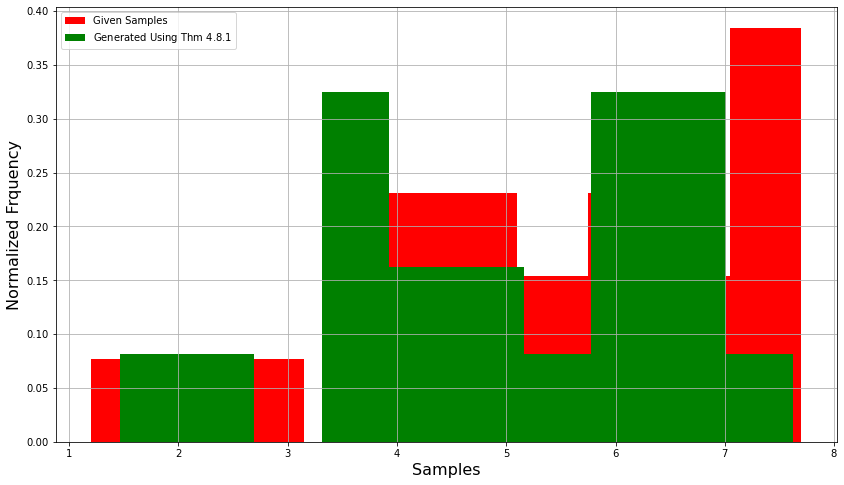

In [47]:
plt.figure(figsize=(14,8))

plt.hist(x,bins=int(len(x)/2),color='r',density=True)
plt.hist(y,bins=int(len(x)/2),color='g',density=True)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('Normalized Frquency',fontsize=16)
plt.legend(['Given Samples','Generated Using Thm $4.8.1$'])
plt.grid()
plt.show()

#### Exercise 6.1.6. 

Suppose $X_1,X_2,...,X_n$ are iid with pdf $f(x;\theta) = (1/\theta)e^{−x/\theta},$ $0 < x < \infty,$ zero elsewhere. Find the mle of $P (X \leq 2)$ and show that it is consistent.

To find MLE, we need to maximize $$\frac{e^{-n\frac{\overline{X_n}}{\theta}}}{\theta^n},$$ where $\overline{X_n}$ is the sample mean. The MLE ends up being $\hat{\theta}=\overline{X_n}$. Now $P(X \leq 2) = g(\theta) = 1-e^{(-2/\theta)}.$ By Theorem $6.1.2$, MLE of $g(\theta) = g(\hat{\theta}) = 1-e^{(-2/\overline{X_n})}.$

Now $\overline{X_n} \xrightarrow{P} \theta$ from Theorem $5.1.1$ and since $g(\theta) = 1-e^{(-2/\theta)}$ is a continuous function, $g(\overline{X_n}) \xrightarrow{P} g(\theta)$ from Theorem $5.1.4.$ In other words, MLE of $P(X \leq 2)$ is consistent. Maybe another approach is to simply apply Corollary $6.1.1.$

#### Exercise 6.1.7.

Let the table ... represent a summary of a sample of size $50$ from a binomial distribution having $n = 5$. Find the mle of $P(X \geq 3)$. For the data in the table, using the R function pbinom determine the realization of the mle.

MLE of binomial distribution parameter $p$ is $\hat{p} = \overline{X_k}/n$, $k=0,1,2,3,4,5$ and $n=50$.

In [48]:
x=[6,10,14,13,6,1]
y = [0,1,2,3,4,5]
n=50
xb = np.sum([i*k for (i,k) in zip(x,y)])/np.max(y)
p=xb/n
print(p)

0.424


MLE of $P(X \geq 3)$ is sum of the pmfs for $\hat{p} = 0.424$ for $X \geq 3$

In [49]:
1-binom.cdf(2,5,p)

0.3596796668477438

#### Exercise 6.1.8.

Let $X_1, X_2, X_3, X_4, X_5$ be a random sample from a Cauchy distribution with median $\theta$, that is, with pdf $$f(x,\theta) = \frac{1}{\pi}\frac{1}{1+(x-\theta)^2}, \quad -\infty < x < \infty,$$ where $-\infty < \theta < \infty.$ Suppose $x_1 =−1.94$, $x_2 =0.59$, $x_3 =−5.98$, $x_4 =−0.08,$ and $x_5 = −0.77.$

(a) Show that the mle can be obtained by minimizing $$\sum_{i=1}^5 \log{\left [ 1 + (x_i-\theta)^2 \right ]}.$$

(b) Approximate the mle by plotting the function in Part (a). Make use of the following R code which assumes that the data are in the R vector x:

theta=seq(-6,6,.001);lfs<-c()

for(th in theta){lfs=c(lfs,sum(log((x-th)^2+1)))} 

plot(lfs~theta)

Following code was obtained through the website -- https://www.codeconvert.ai/r-to-python-converter

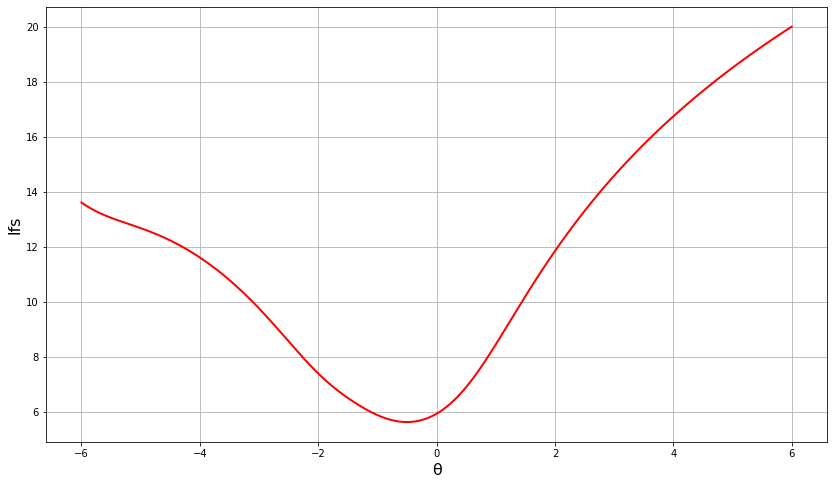

In [50]:
x=[-1.94,0.59,-5.98,-0.008,-0.77]
theta = np.arange(-6, 6, 0.001)
lfs = []
for th in theta:
    lfs.append(np.sum(np.log((x - th)**2 + 1)))

plt.figure(figsize=(14,8))
plt.plot(theta, lfs,linewidth=2,color='r')
plt.xlabel('\u03B8',fontsize=16)
plt.ylabel('lfs',fontsize=16)
plt.grid()
plt.show()

#### Exercise 6.1.9.

Let the table


x|0|1|2|3|4|5
-|-|-|-|-|-|-
Frequency|7|14|12|13|6|3

represent a summary of a random sample of size $55$ from a Poisson distribution. Find the maximum likelihood estimator of $P (X = 2)$. Use the R function dpois to find the estimator’s realization for the data in the table.


LE ends up being $$\lambda^{n\overline{X}}e^{-n\lambda}$$ where factors not dependent on $\lambda$ have not been included. Then MLE ends up being $\hat{\lambda}=\overline{X}$ and this in our case is $(0*7+1*14+2*12+3*13+4*6+5*3)/55=2.11.$ The MLE of $P(X=2) = e^{-2.11}2.11^2/2 = 0.26988.$

In [51]:
(math.e)**(-2.11)*2.11**2/2

0.2698817751790293

#### Exercise 6.1.10, 6.1.12, 6.1.13

Solutions are easy and Tomoki Okuno has solutions in -- https://tomoki-okuno.com/

#### Exercise 6.1.11.

Solution is once again very easy and is in the solutions manual.